In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('RAW_recipes.csv')

In [28]:
df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


nutrition - calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) ,carbohydrates (PDV)

In [29]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True) 

In [30]:
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 

In [31]:
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))

In [32]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

<AxesSubplot:>

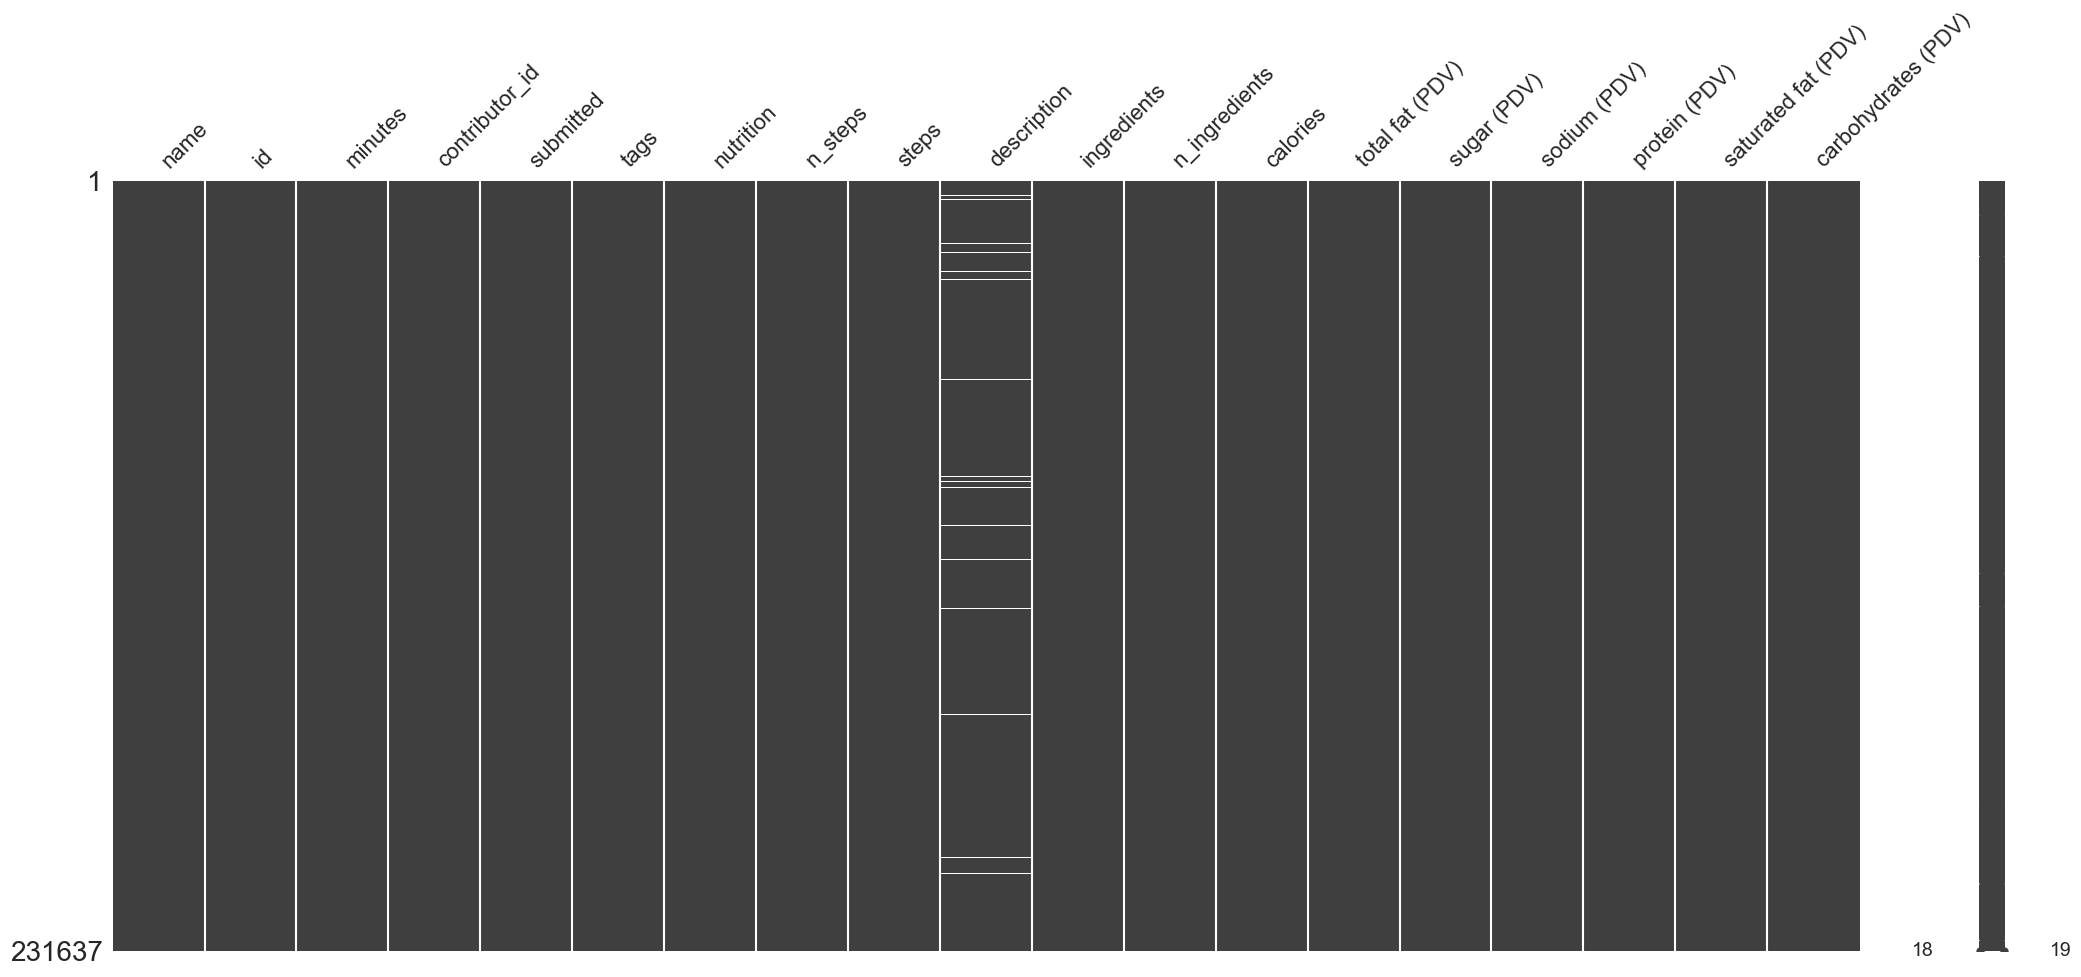

In [33]:
import missingno as msno

msno.matrix(df)

In [34]:
df.drop(['nutrition', 'contributor_id', 'description', 'steps', 'name', 'id', 'submitted', 'ingredients', 'tags', 'minutes'], axis=1, inplace=True)

In [35]:
# df.drop(['steps', 'ingredients'], axis=1, inplace=True)

In [36]:
df.head(5)

,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,6,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,11,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,5,8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   n_steps              231637 non-null  int64  
 1   n_ingredients        231637 non-null  int64  
 2   calories             231637 non-null  float64
 3   total fat (PDV)      231637 non-null  float64
 4   sugar (PDV)          231637 non-null  float64
 5   sodium (PDV)         231637 non-null  float64
 6   protein (PDV)        231637 non-null  float64
 7   saturated fat (PDV)  231637 non-null  float64
 8   carbohydrates (PDV)  231637 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 15.9 MB


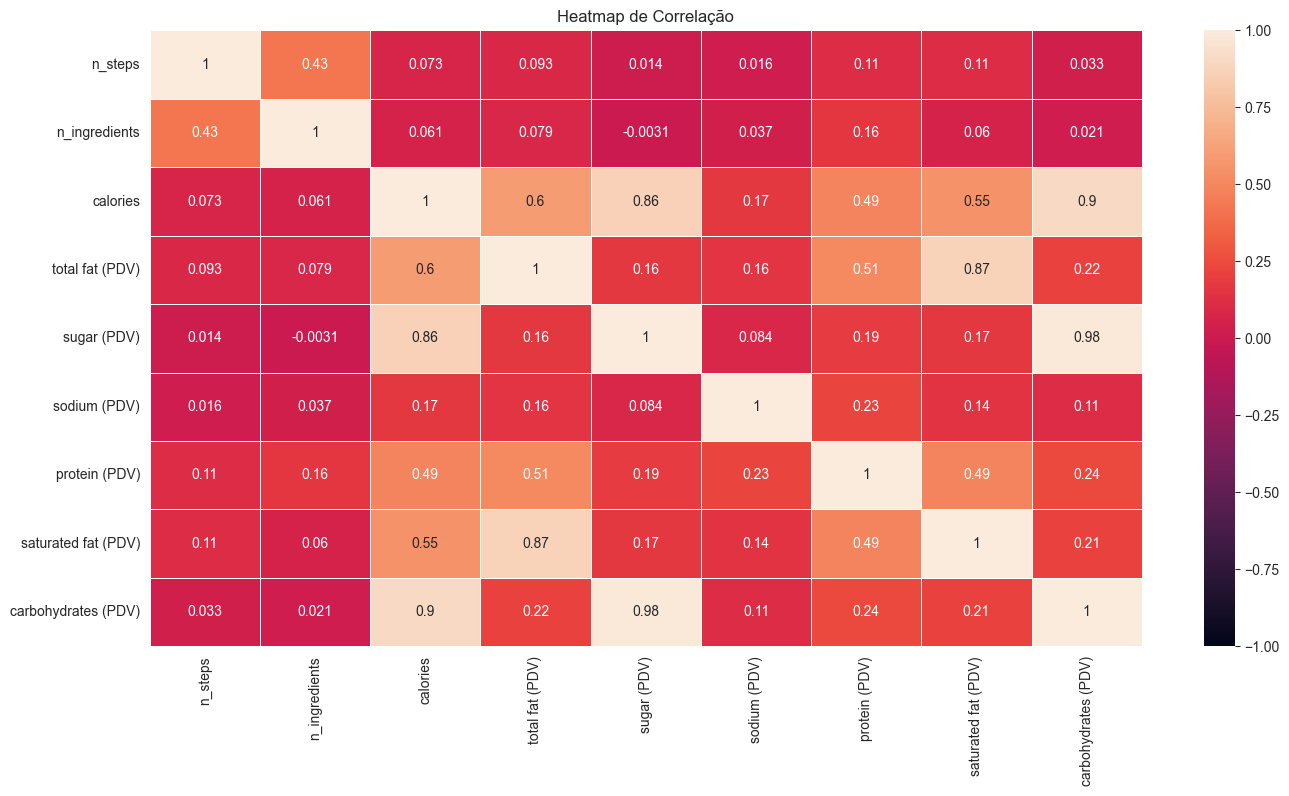

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap de Correlação')
plt.show()

In [39]:
df_amostra = df.sample(n=15000, random_state=42)

In [40]:
df_amostra

,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
59957,16,9,69.2,3.0,9.0,6.0,5.0,4.0,3.0
68281,4,12,256.0,2.0,40.0,18.0,18.0,1.0,18.0
71122,6,5,58.6,5.0,19.0,0.0,0.0,2.0,2.0
163767,7,10,241.5,12.0,20.0,45.0,62.0,13.0,2.0
136941,2,8,212.8,24.0,30.0,0.0,4.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...
90559,6,8,691.0,50.0,3.0,42.0,48.0,70.0,25.0
43198,22,13,580.7,62.0,4.0,22.0,71.0,95.0,5.0
2346,11,13,362.3,40.0,15.0,65.0,15.0,18.0,8.0
212494,4,8,52.8,6.0,5.0,4.0,1.0,3.0,1.0


In [41]:
df_amostra = df_amostra[df_amostra['calories'] < 2000]
df_amostra = df_amostra[df_amostra['sugar (PDV)'] < 600]
df_amostra = df_amostra[df_amostra['sodium (PDV)'] < 500]
df_amostra = df_amostra[df_amostra['saturated fat (PDV)'] < 500]

In [42]:
sns.set_style("whitegrid", {'axes.facecolor': '#f7f3e7'})

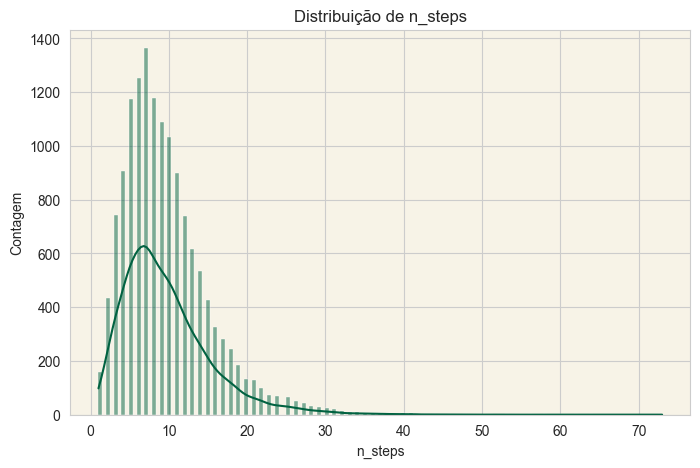

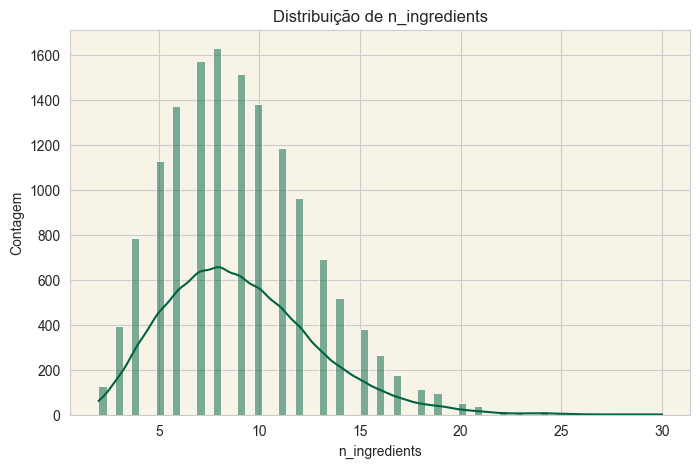

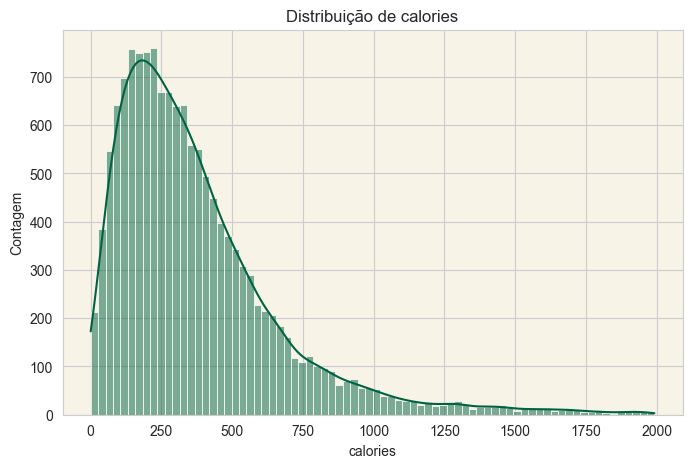

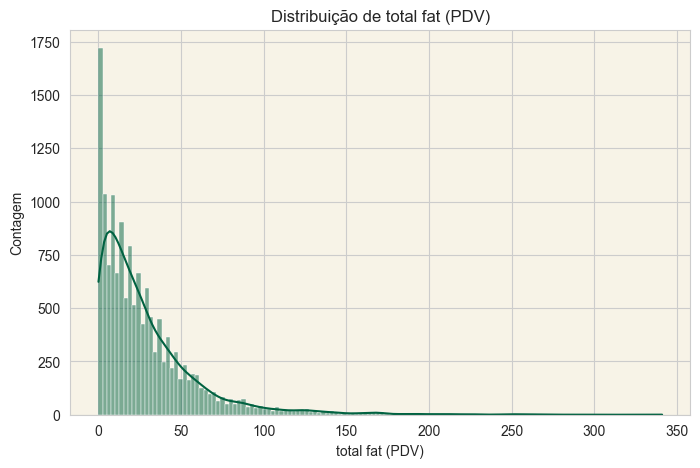

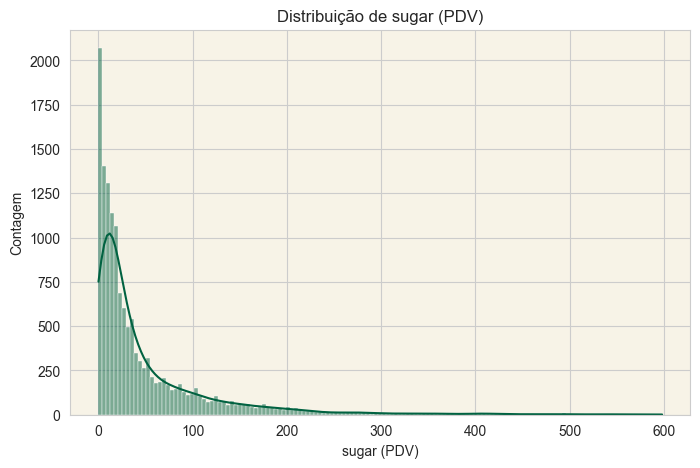

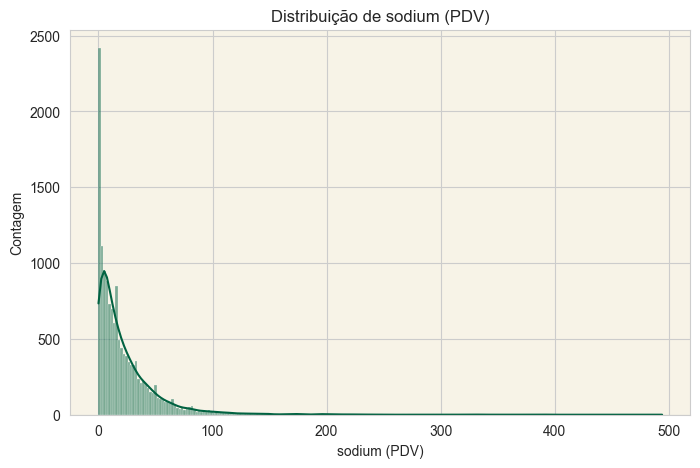

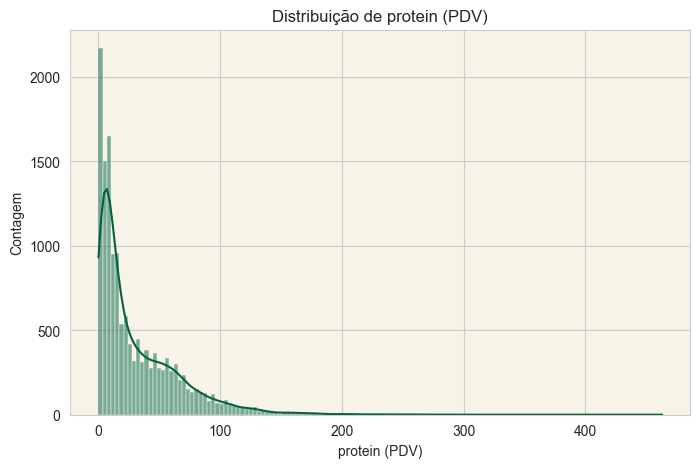

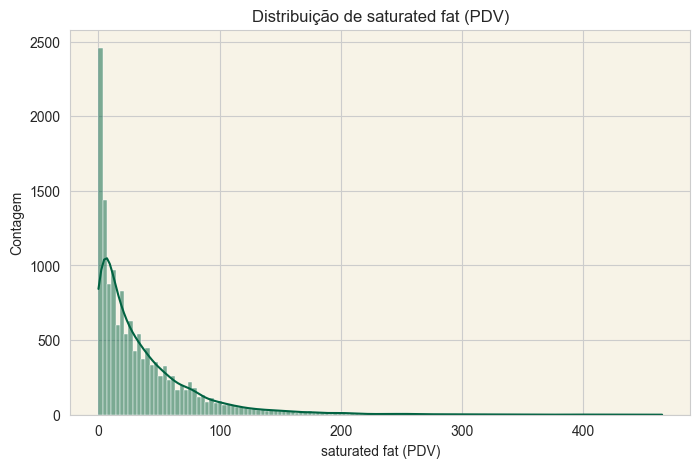

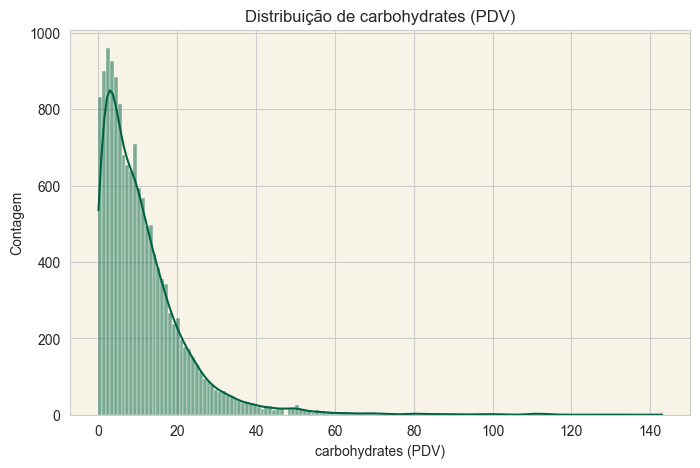

In [43]:


colunas = ['n_steps', 'n_ingredients', 'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']

for coluna in colunas:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df_amostra, x=coluna, kde=True, color="#016241")
        plt.title(f'Distribuição de {coluna}')
        plt.xlabel(coluna)
        plt.ylabel('Contagem')
        plt.show()

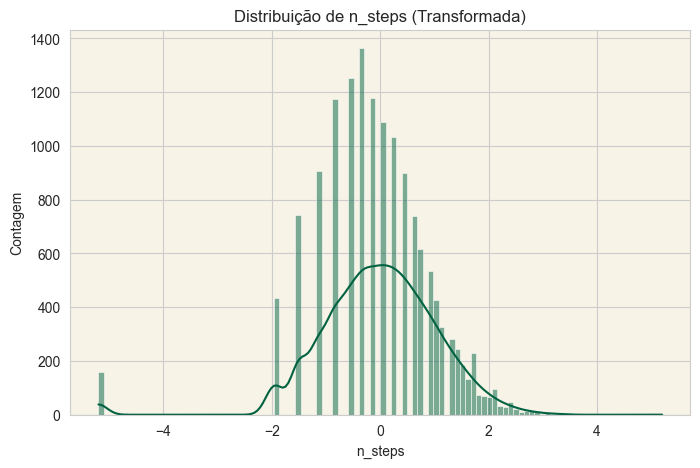

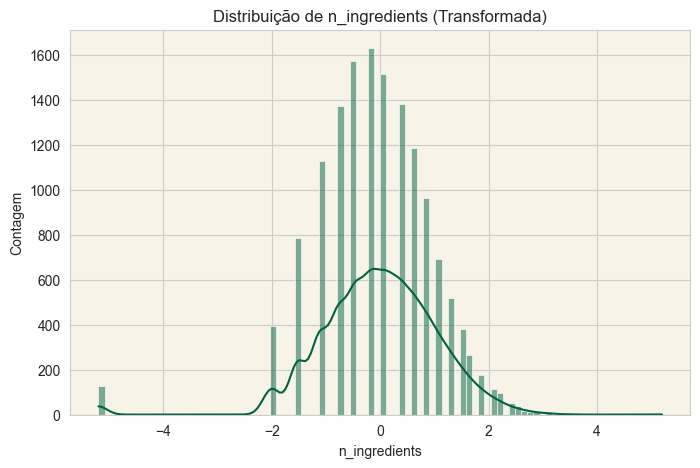

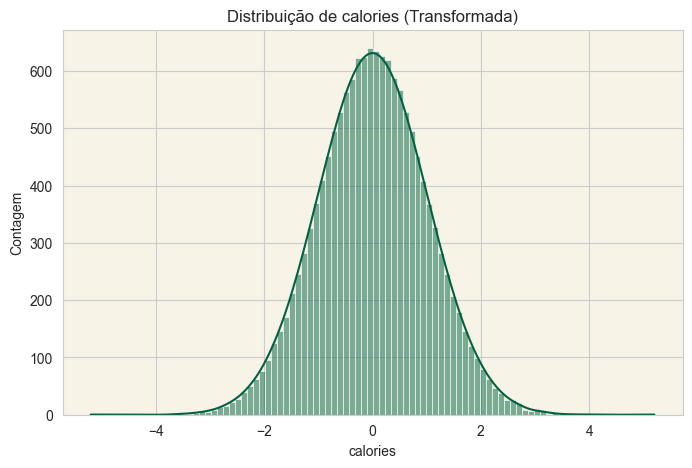

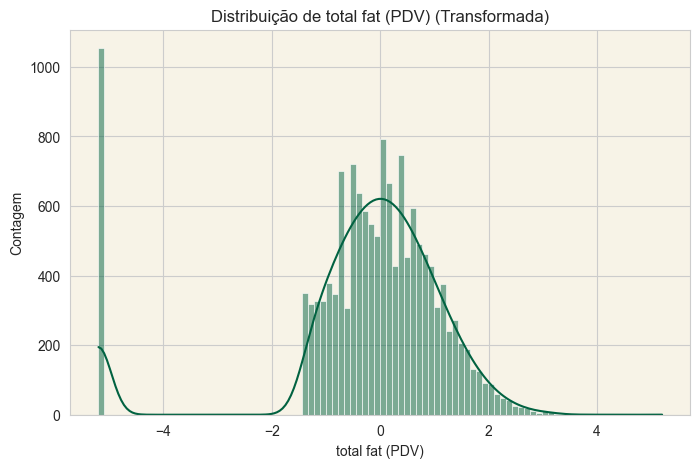

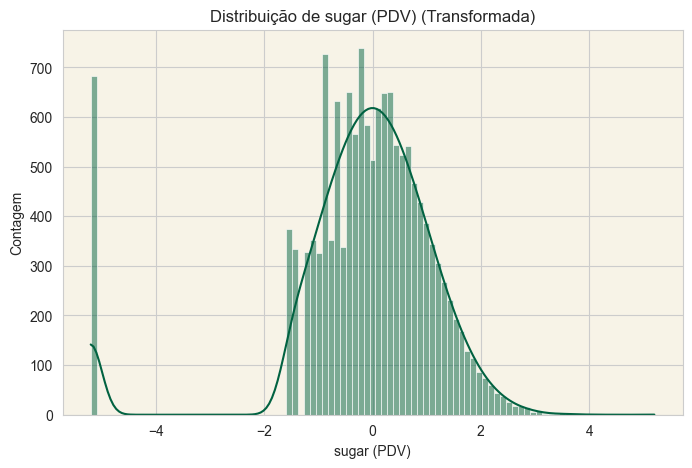

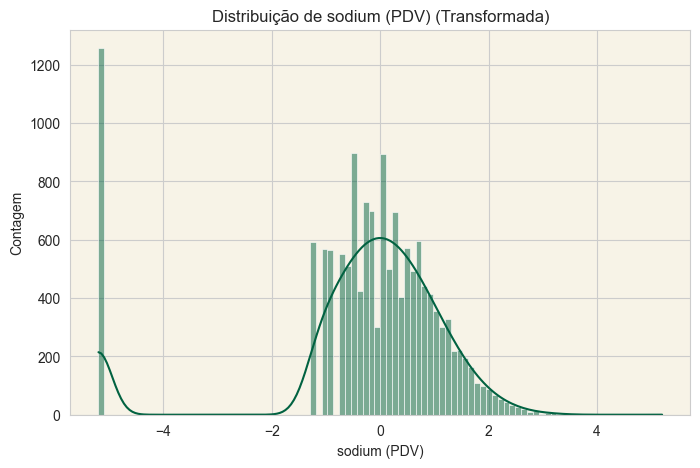

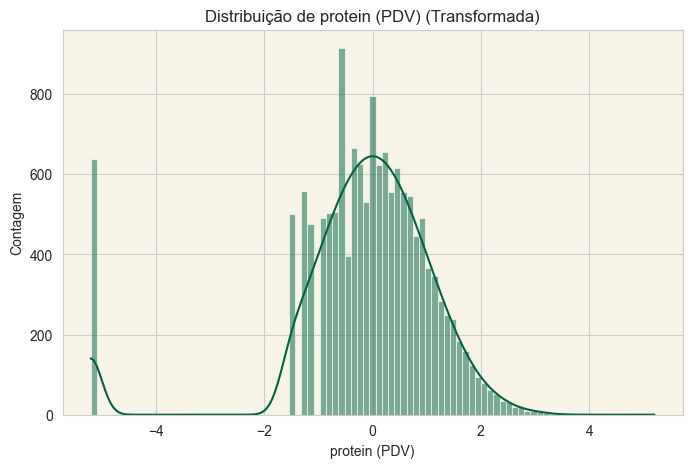

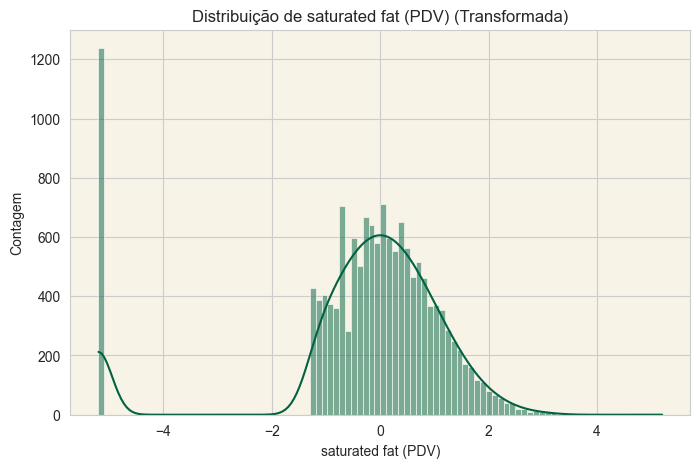

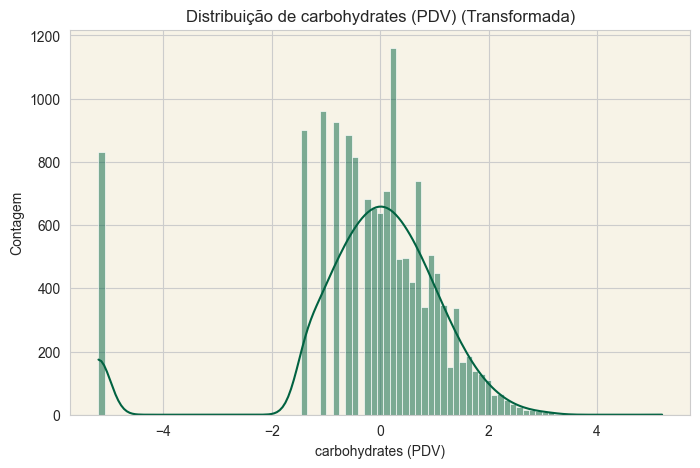

In [44]:
from sklearn.preprocessing import QuantileTransformer

# Aplicar QuantileTransformer a cada coluna e plotar a distribuição
for coluna in colunas:
        quantile_transformer = QuantileTransformer(output_distribution='normal')
        df_amostra[coluna] = quantile_transformer.fit_transform(df_amostra[[coluna]])
        
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df_amostra, x=coluna, kde=True, color="#016241")
        plt.title(f'Distribuição de {coluna} (Transformada)')
        plt.xlabel(coluna)
        plt.ylabel('Contagem')
        plt.show()

In [45]:
df_amostra.head(3)

,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
59957,1.169401,0.094232,-1.516752,-1.125776,-0.672129,-0.539431,-0.837338,-0.905189,-0.779924
68281,-1.157061,0.846279,-0.211070,-1.239352,0.395204,0.196979,0.016310,-1.280981,0.895780
71122,-0.583496,-1.128144,-1.652504,-0.924252,-0.125788,-5.199338,-5.199338,-1.132898,-1.025123


In [46]:
X = df_amostra.iloc[:, 2:].values

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X)
kmeans.cluster_centers_ # média de cada grupo
kmeans.labels_ # rótulos dos grupo associados a cada exemplo
clusters.inertia_ # dissimilaridade - pode ser usado no Elbow method

148903.67906618357

In [48]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X)
kmeans.cluster_centers_ # média de cada grupo
kmeans.labels_ # rótulos dos grupo associados a cada exemplo
clusters.inertia_ # dissimilaridade - pode ser usado no Elbow method

148903.67906618357

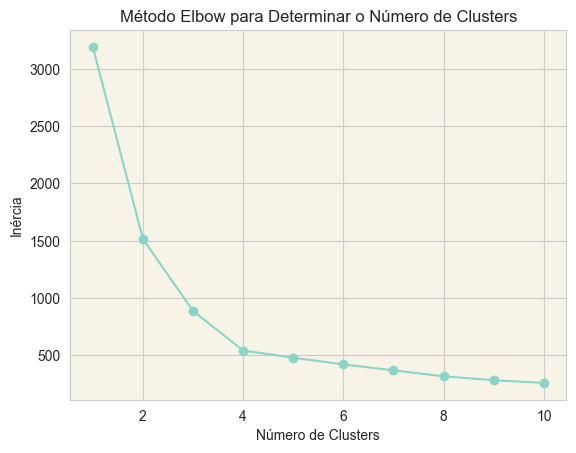

In [49]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=0)
inertia_values = []

for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.show()


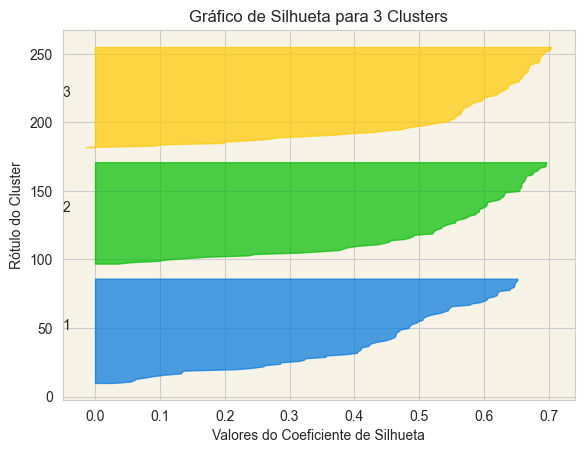

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

# Gerando dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)

# Faça um loop sobre diferentes números de clusters
range_n_clusters = range(2, 5)

# for n_clusters in range_n_clusters:
# Crie um subplot para cada número de clusters
plt.figure()
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.4)

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(1, 4):
        # Agregue os coeficientes de silhueta para os pontos dentro do cluster i e classifique-os
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / 4)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiqueta do cluster no meio
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Calcule o novo y_lower para o próximo gráfico
        y_lower = y_upper + 10  # Deixa 10 para espaço em branco entre os clusters

        plt.title(f"Gráfico de Silhueta para {3} Clusters")
        plt.xlabel("Valores do Coeficiente de Silhueta")
        plt.ylabel("Rótulo do Cluster")

# Exibir os gráficos
plt.show()
